

Coding and NonCoding DNA Sequences

 Indicates whether the DNA sequence is coding (1) or non-coding (0).



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2000 sequences, 50 bases in length
df = pd.read_csv("Coding_NonCoding_DNA_Sequences.csv")

df.head()

,Unnamed: 0,gene_features,DNA_sequence,Target
0,0,MISEQ:128:000000000-A7920:1:1101:11461:1213_1:...,CTCTTGCGGTCGATCTGGTCACGGGTGATGGTGAAGGTTACGTAGT...,1
1,1,MISEQ:128:000000000-A7920:1:1101:19397:1484_1:...,TCGCGGTCCCGAGCCTGATCGTGCGCCGCGCCAACACGACGGTCGA...,1
2,2,MISEQ:128:000000000-A7920:1:1101:21205:1490_1:...,GGCTACGACGTGACCGCGGGGCAGGTGCTCGTGACCAACGGCGGCA...,1
3,3,MISEQ:128:000000000-A7920:1:1101:16161:1594_1:...,CAGGTAGGTGCCACAGTAGTAAGCGGTGATGCAGTTGCCCCTGAAT...,1
4,4,MISEQ:128:000000000-A7920:1:1101:17492:1673_1:...,GAGTTGTCCTGGTAAGATTCTTACCCATGCGAATCACGTCGAAAGG...,1


In [ ]:
df.drop(['Unnamed: 0','gene_features'],axis=1)

,DNA_sequence,Target
0,CTCTTGCGGTCGATCTGGTCACGGGTGATGGTGAAGGTTACGTAGT...,1
1,TCGCGGTCCCGAGCCTGATCGTGCGCCGCGCCAACACGACGGTCGA...,1
2,GGCTACGACGTGACCGCGGGGCAGGTGCTCGTGACCAACGGCGGCA...,1
3,CAGGTAGGTGCCACAGTAGTAAGCGGTGATGCAGTTGCCCCTGAAT...,1
4,GAGTTGTCCTGGTAAGATTCTTACCCATGCGAATCACGTCGAAAGG...,1
...,...,...
65316,CTGCGCATCCTTCATGTGGATGAGCGCGAGCGCAGAATCCGCATCG...,0
65317,GTCCGCCAATGACCTCCTGCAGGCCACCGCCAAACAGGGCCTGCCG...,0
65318,CGCCAAGGGCAACCAGATCACCCCCTCCGGGAACGCCCTCATCAAC...,0
65319,GTCTTTCAACACAACGTGCGTGGTGAGGGATGGCGGTTGGGGGGTC...,0


In [ ]:
df.rename(columns={'Target': 'Labels'}, inplace=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# The LabelEncoder encodes each base within a sequence as an integer (0, 1, 2, or 3).
integer_encoder = LabelEncoder()


# The OneHotEncoder converts each integer into its one-hot encoded representation.
one_hot_encoder = OneHotEncoder(categories='auto')

input_features = []  # List that one-hot encoded bases will be appended to.

# Convert raw bases (i.e., 'A', 'C', 'G', "T") to one-hot encoded representation.
for indx in df.index:
    integer_encoded = integer_encoder.fit_transform(list(df['DNA_sequence'][indx]))# Convert string of bases to numbers
    integer_encoded = np.array(integer_encoded).reshape(-1, 1) # Convert the list of numbers to a 1-column array.
    one_hot_encoded = one_hot_encoder.fit_transform(integer_encoded) # One-hot encode each number in the array.
    input_features.append(one_hot_encoded.toarray())

max_rows = max(feature.shape[0] for feature in input_features)
max_cols = max(feature.shape[1] for feature in input_features)

# Pad each array to the same shape (max_rows, max_cols)
padded_features = [
    np.pad(feature, ((0, max_rows - feature.shape[0]), (0, max_cols - feature.shape[1])), mode='constant')
    for feature in input_features
]

# Stack the padded arrays
stacked_features = np.stack(padded_features)

#input_features = np.stack(input_features)  # Combine all encoded sequences into a single array.
input_labels = np.array(df["Labels"]).reshape(-1, 1) # Place the respective labels into "input_labels" variable.

In [ ]:
df["DNA_sequence"][1]

'TCGCGGTCCCGAGCCTGATCGTGCGCCGCGCCAACACGACGGTCGAGCTGCGCGACGGCCAGAGCTTCGCCATGGCCGGGCTGCTGCAGAACACCAGTAACGCCAACCTGCAACAGCTTCCGTGGATCGGCGACGTGCCGGTG'

In [ ]:
# One-hot encoded:CTCTTGCGGTCGATCTGGTCACGGGTGATGGTGAAGGTTACGTAGTCGGGAGCGCCTTCGCGCGAGACCACGACCTTTACCTGCGTGCCGCGAGGTCCCTTGAGC

print(input_features[0])

[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0.

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)


X_train shape: (52256, 0)
X_test shape: (13065, 0)


In [ ]:
# Ensure both train and test sets are padded
X_train_padded = pad_sequences(X_train, maxlen=MAX_SEQUENCE_LENGTH, padding="post", dtype="float32")
X_test_padded = pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH, padding="post", dtype="float32")

# Expand dimensions to match (samples, timesteps, features)
X_train = np.expand_dims(X_train_padded, axis=-1)
X_test = np.expand_dims(X_test_padded, axis=-1)

print("X_train shape:", X_train.shape)  # Should be (samples, timesteps, 1)
print("X_test shape:", X_test.shape)  # Should be (samples, timesteps, 1)


X_train shape: (65321, 3, 1)
X_test shape: (13065, 3, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Masking

# Define model
model = Sequential([
    Masking(mask_value=0.0, input_shape=(X_train.shape[1], X_train.shape[2])),  # Handle padding
    LSTM(64, return_sequences=True),  # First LSTM layer with return_sequences=True
    LSTM(32),  # Second LSTM layer
    Dense(1, activation='sigmoid')  # Binary classification (adjust for multi-class)
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Show model summary
model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ masking_2 (Masking)                  │ (None, 3, 1)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 3, 64)               │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
X_train = X_train[:len(y_train)]


In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
1633/1633 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6971 - loss: 0.6521 - val_accuracy: 0.6991 - val_loss: 0.6120
Epoch 2/10
1633/1633 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6966 - loss: 0.6138 - val_accuracy: 0.6991 - val_loss: 0.6116
Epoch 3/10
1633/1633 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.6977 - loss: 0.6128 - val_accuracy: 0.6991 - val_loss: 0.6116
Epoch 4/10
1633/1633 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7001 - loss: 0.6108 - val_accuracy: 0.6991 - val_loss: 0.6116
Epoch 5/10
1633/1633 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6939 - loss: 0.6160 - val_accuracy: 0.6991 - val_loss: 0.6116
Epoch 6/10
1633/1633 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7015 - loss: 0.6096 - val_accuracy: 0.6991 - val_loss: 0.6116
Epoch 7/10
1633/1633 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6983 - loss: 0.6124 - val_accuracy: 0.6991 - val_loss: 0.6116
Epoch 8/10
1633/1633 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6960 - loss: 0

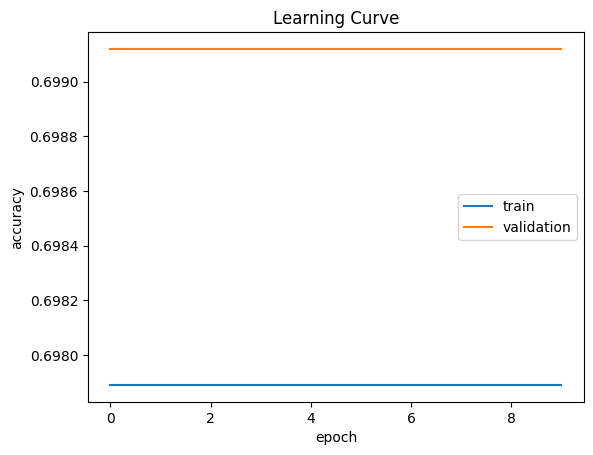

In [ ]:
# Visualize the learning curve
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Learning Curve')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation']);

In [ ]:
results = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy:", results[1])

Test accuracy: 0.6991198062896729


Thank you!!